In [17]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [18]:
#import Csv
redWine = pd.read_csv('/Users/heath/Project-3-Wine/Data/wineQualityReds.csv', index_col=0)
whiteWine = pd.read_csv('/Users/heath/Project-3-Wine/Data/wineQualityWhites.csv', index_col=0)

In [19]:
#add color to the csvs based on data location
redWine['wine_color'] = 'red'
whiteWine['wine_color'] = 'white'
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
id,,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [20]:
#rename white wine data set columns that are mismatched to red wine data
whiteWine.rename({"fixed.acidity": "fixed acidity",
                 "volatile.acidity": "volatile acidity",
                 "citric.acid": "citric acid",
                 "residual.sugar": "residual sugar",
                 "free.sulfur.dioxide": "free sulfur dioxide",
                 "total.sulfur.dioxide": "total sulfur dioxide",
                 "pH": "ph"},
                axis = "columns", inplace = True)


whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [21]:
#concatenate red & white wine frames
frames = [redWine, whiteWine]
wine = pd.concat(frames)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


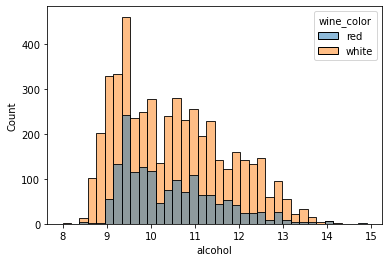

In [22]:
#analyze alc content data

sns.histplot(data=wine, x="alcohol", hue="wine_color")

In [47]:
x1= wine['alcohol']
y1= wine['density']
print(np.corrcoef(x1, y1))

[[ 1.         -0.68674542]
 [-0.68674542  1.        ]]


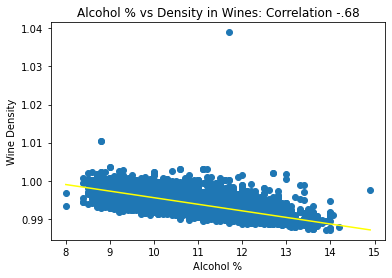

In [48]:
plt.scatter(x1, y1)
plt.title('Alcohol % vs Density in Wines: Correlation -.68')
plt.xlabel('Alcohol %')
plt.ylabel('Wine Density')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), color='yellow')
plt.show()


In [49]:
y2= wine['ph']
print(np.corrcoef(x1, y2))

[[1.         0.12124847]
 [0.12124847 1.        ]]


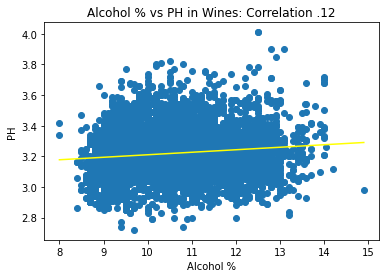

In [51]:
plt.scatter(x1, y2)
plt.title('Alcohol % vs PH in Wines: Correlation .12')
plt.xlabel('Alcohol %')
plt.ylabel('PH')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y2, 1))(np.unique(x1)), color='yellow')
plt.show()

In [52]:
y3= wine['quality']
print(np.corrcoef(x1, y3))

[[1.         0.44431852]
 [0.44431852 1.        ]]


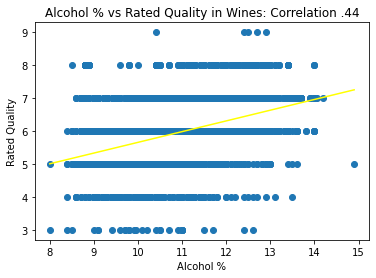

In [54]:
plt.scatter(x1, y3)
plt.title('Alcohol % vs Rated Quality in Wines: Correlation .44')
plt.xlabel('Alcohol %')
plt.ylabel('Rated Quality')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y3, 1))(np.unique(x1)), color='yellow')
plt.show()